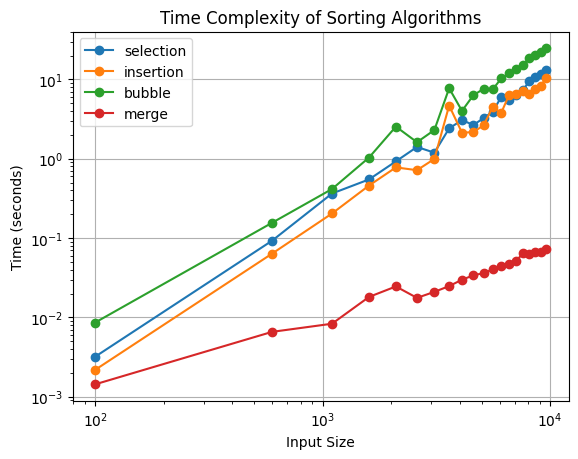

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt

def selection_sort(arr):
    size = len(arr)
    for i in range(size - 1):
        minimum = i
        for j in range(i + 1, size):
            if arr[j] < arr[minimum]:
                minimum = j
        if minimum != i:
            arr[i], arr[minimum] = arr[minimum], arr[i]

def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def measure_time(algorithms, sizes):
    times = {algorithm: [] for algorithm in algorithms}
    for size in sizes:
        arr = np.random.rand(size)
        for algorithm in algorithms:
            start_time = time.time()
            if algorithm == 'selection':
                selection_sort(arr.copy())
            elif algorithm == 'insertion':
                insertion_sort(arr.copy())
            elif algorithm == 'bubble':
                bubble_sort(arr.copy())
            elif algorithm == 'merge':
                merge_sort(arr.copy())
            end_time = time.time()
            times[algorithm].append(end_time - start_time)
    return times

def plot_time_complexity(sizes, times, algorithms):
    for algorithm in algorithms:
        plt.plot(sizes, times[algorithm], marker='o', label=algorithm)
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('Time Complexity of Sorting Algorithms')
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

sizes = range(100, 10000, 500)
algorithms = ['selection', 'insertion', 'bubble', 'merge']
times = measure_time(algorithms, sizes)
plot_time_complexity(sizes, times, algorithms)
